
File Count per Transport Mode:
  Transport Mode  File Count
1           walk         459
3            bus         249
2           bike         211
0         subway          87
4           taxi          47
5            car          31
6          train           9
7            run           1
8     motorcycle           1
9           boat           1


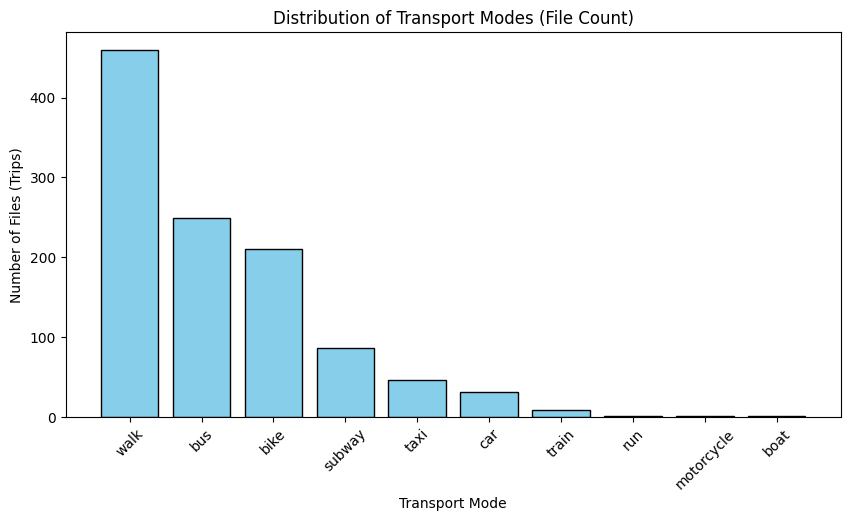

In [9]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset folder path (Adjust as needed)
folder_path = "Sub_Trajectories_Cleaned"

# Find all .geojson files in subdirectories
geojson_files = glob.glob(os.path.join(folder_path, "**/*_cleaned.geojson"), recursive=True)

# Dictionary to count transport modes
transport_mode_counts = {}

# Extract transport modes from filenames
for file in geojson_files:
    filename = os.path.basename(file)
    
    # Extract transport mode from filename (assumes format like 'walk_cleaned.geojson')
    transport_mode = filename.split("_cleaned.geojson")[0]
    
    # Count occurrences
    transport_mode_counts[transport_mode] = transport_mode_counts.get(transport_mode, 0) + 1

# Convert to DataFrame for visualization
df_counts = pd.DataFrame(list(transport_mode_counts.items()), columns=["Transport Mode", "File Count"])
df_counts = df_counts.sort_values(by="File Count", ascending=False)

# Print file count per transport mode
print("\nFile Count per Transport Mode:")
print(df_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(df_counts["Transport Mode"], df_counts["File Count"], color="skyblue", edgecolor="black")
plt.xlabel("Transport Mode")
plt.ylabel("Number of Files (Trips)")
plt.title("Distribution of Transport Modes (File Count)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

# Example DataFrame with file counts per transport mode
data = {
    'Transport Mode': ['walk', 'bus', 'bike', 'car', 'subway', 'taxi', 'train', 'airplane', 'boat', 'run', 'motorcycle'],
    'File Count': [2251, 1306, 1051, 705, 508, 396, 142, 14, 5, 4, 1]
}

df_counts = pd.DataFrame(data)
print("Original Distribution:")
print(df_counts)

# Step 1.1: Merge 'taxi' into 'car'
df_counts['Transport Mode'] = df_counts['Transport Mode'].replace({'taxi': 'car'})

# Step 1.2 : Merge 'subway' into 'train'
df_counts['Transport Mode'] = df_counts['Transport Mode'].replace({'subway': 'train'})

# Step 2: Group by the updated transport modes and sum file counts
df_grouped = df_counts.groupby('Transport Mode', as_index=False)['File Count'].sum()
print("\nAfter Merging 'taxi' with 'car':")
print(df_grouped)

# Step 3: Remove transport modes with very low file counts.
# For example, remove any mode with fewer than 50 files.
threshold = 50
df_filtered = df_grouped[df_grouped['File Count'] >= threshold].reset_index(drop=True)
print("\nAfter Removing Low-Count Modes (threshold < 50):")
print(df_filtered)

Original Distribution:
   Transport Mode  File Count
0            walk        2251
1             bus        1306
2            bike        1051
3             car         705
4          subway         508
5            taxi         396
6           train         142
7        airplane          14
8            boat           5
9             run           4
10     motorcycle           1

After Merging 'taxi' with 'car':
  Transport Mode  File Count
0       airplane          14
1           bike        1051
2           boat           5
3            bus        1306
4            car        1101
5     motorcycle           1
6            run           4
7          train         650
8           walk        2251

After Removing Low-Count Modes (threshold < 50):
  Transport Mode  File Count
0           bike        1051
1            bus        1306
2            car        1101
3          train         650
4           walk        2251


In [15]:
import os
import glob
import geopandas as gpd
import pandas as pd

# Define the folder path where the cleaned sub-trajectories are stored.
folder_path = "Sub_Trajectories_Cleaned"

# Use glob to search recursively for all GeoJSON files in the folder.
geojson_files = glob.glob(os.path.join(folder_path, "**/*.geojson"), recursive=True)
print(f"Number of GeoJSON files found: {len(geojson_files)}")

# List to store individual GeoDataFrames
gdf_list = []

# Loop over each file and load it
for file in geojson_files:
    try:
        gdf = gpd.read_file(file)
        # Optional: Ensure the file contains the key column "transport_mode"
        if "transport_mode" in gdf.columns:
            gdf_list.append(gdf)
        else:
            print(f"Skipping {file}: 'transport_mode' column not found")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all GeoDataFrames if any files were loaded
if gdf_list:
    combined_gdf = pd.concat(gdf_list, ignore_index=True)
    print("Combined GeoDataFrame shape:", combined_gdf.shape)
    
    # Display the first few rows for inspection
    display(combined_gdf.head())
    
    # Optional: If you prefer to drop the geometry column for ML purposes,
    # you can convert it to a regular DataFrame like this:
    combined_df = pd.DataFrame(combined_gdf.drop(columns="geometry"))
    # Save the combined DataFrame to CSV for later use
    combined_df.to_csv("combined_cleaned_data.csv", index=False)
    print("Combined data saved to 'combined_cleaned_data.csv'.")
else:
    print("No GeoJSON files were loaded. Please check the folder path or file format.")

Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10


Number of GeoJSON files found: 1096


Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported O

Combined GeoDataFrame shape: (431565, 24)


,lat,lon,zero,altitude,timestamp_days,date,source_folder,file,transport_mode,new_index,...,next_lon,time_diff,segment,traj_id,datetime,speed_norm,acceleration_norm,speed_smooth,acceleration_smooth,geometry
0,39.977650,116.331447,0,-103.0,39755.459676,2008-11-03,084,20081103034908.plt,subway,714264,...,116.331505,420.0,4,20081103034908.plt,2008-11-03 11:01:56,-2.186892,-0.364832,0.866716,0.031519,POINT (12949957.443 4862694.97)
1,39.977685,116.331505,0,-105.0,39755.459734,2008-11-03,084,20081103034908.plt,subway,714265,...,116.331561,5.0,4,20081103034908.plt,2008-11-03 11:02:01,-0.060714,0.373297,1.125689,0.042025,POINT (12949963.9 4862700.054)
2,39.977737,116.331561,0,-108.0,39755.459792,2008-11-03,084,20081103034908.plt,subway,714266,...,116.331582,5.0,4,20081103034908.plt,2008-11-03 11:02:06,-0.060714,0.373297,1.391866,0.062366,POINT (12949970.134 4862707.608)
3,39.977749,116.331582,0,-110.0,39755.459850,2008-11-03,084,20081103034908.plt,subway,714267,...,116.331611,5.0,4,20081103034908.plt,2008-11-03 11:02:11,-1.094227,0.349682,1.140098,0.061693,POINT (12949972.471 4862709.351)
4,39.977770,116.331611,0,-111.0,39755.459907,2008-11-03,084,20081103034908.plt,subway,714268,...,116.331587,5.0,4,20081103034908.plt,2008-11-03 11:02:16,-1.094227,0.349682,1.063022,0.075619,POINT (12949975.7 4862712.402)


Combined data saved to 'combined_cleaned_data.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# For balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# =============================
# Step 1: Load Combined Cleaned Data
# =============================
data_path = "balanced_cleaned_data.csv"  # Update path as needed
# data_path = "combined_cleaned_data.csv"  # Update path as needed
df = pd.read_csv(data_path)

# =============================
# Step 2: Define Candidate Features
# Use the pre-normalized and smoothed features produced during preprocessing.
candidate_features = [
    'speed_norm', 'acceleration_norm', 'bearing_change_norm',
    'speed_smooth', 'acceleration_smooth', 'bearing_change_smooth'
]
# Filter candidate features to those present in the DataFrame.
candidate_features = [feat for feat in candidate_features if feat in df.columns]
print("Candidate Features:", candidate_features)

# =============================
# Step 2a: Merge and Remove Certain Classes
# Merge "taxi" into "car"
df['transport_mode'] = df['transport_mode'].replace({'taxi': 'car'})

# Remove low-support classes that are too small to balance effectively.
# Based on your distribution, we remove: "motorcycle", "run", "boat", "airplane"
low_support_classes = ["motorcycle", "run", "boat", "airplane"]
df = df[~df['transport_mode'].isin(low_support_classes)]

print("\nTransport mode distribution after merging 'taxi' into 'car' and removing low-support classes:")
print(df['transport_mode'].value_counts())

# =============================
# Step 3: Drop Rows with Missing Values
# Store the initial number of rows.
initial_row_count = df.shape[0]

# Drop rows missing any candidate feature or target variable.
df = df.dropna(subset=candidate_features + ['transport_mode'])
# print(df.head())
df['transport_mode'] = df['transport_mode'].replace({'subway': 'train'})

# Log the number of rows removed.
final_row_count = df.shape[0]
removed_rows = initial_row_count - final_row_count
print(f"\nRows before dropna: {initial_row_count}")
print(f"Rows after dropna: {final_row_count}")
print(f"Rows removed: {removed_rows}")

# =============================
# Step 4: Correlation Analysis
# Plot a correlation matrix for the candidate features.
corr_matrix = df[candidate_features].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(candidate_features)), candidate_features, rotation=45)
plt.yticks(range(len(candidate_features)), candidate_features)
plt.title("Correlation Matrix for Candidate Features")
plt.show()

# =============================
# Step 5: Prepare Data for Modeling
# Define feature matrix X and target y.
X = df[candidate_features]
y = df['transport_mode']

# Since features are pre-normalized, we can use them directly.
X_values = X.values

# =============================
# Step 6: Split Data (Train/Test) Using Stratification
# Stratification ensures the training and testing sets preserve the overall class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X_values, y, test_size=0.3, stratify=y, random_state=42
)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())

# =============================
# Step 7: Hybrid Balancing on the Training Set
# First apply SMOTE to oversample minority classes.

# Print the original training set class distribution
print("Original training class distribution:")
print(Counter(y_train))

# # Step A: Oversample minority classes using SMOTE to bring any class below 50,000 up to 50,000.
# smote_strategy = {cl: 50000 for cl, count in Counter(y_train).items() if count < 50000}
# print("\nSMOTE sampling strategy:", smote_strategy)

# if smote_strategy:
#     smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
#     X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
# else:
#     X_train_over, y_train_over = X_train, y_train

# print("\nClass distribution after SMOTE oversampling:")
# print(Counter(y_train_over))

# # Step B: Undersample classes with more than 50,000 samples down to exactly 50,000 using RandomUnderSampler.
# rus_strategy = {cl: 50000 for cl in np.unique(y_train_over)}
# print("\nRandomUnderSampler sampling strategy:", rus_strategy)

# rus = RandomUnderSampler(sampling_strategy=rus_strategy, random_state=42)
# X_train_bal, y_train_bal = rus.fit_resample(X_train_over, y_train_over)

# print("\nFinal balanced training class distribution:")
# print(Counter(y_train_bal))
# # =============================
# # Step 7: Hybrid Balancing on the Training Set
# smote = SMOTE(random_state=42)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# # Then apply RandomUnderSampler to undersample majority classes.
# rus = RandomUnderSampler(random_state=42)
# X_train_bal, y_train_bal = rus.fit_resample(X_train_over, y_train_over)

# print("\nClass distribution after hybrid balancing:")
# print(pd.Series(y_train_bal).value_counts())

# # =============================
# # Step 8: Train a Random Forest Classifier on Balanced Data
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train_bal, y_train_bal)

# # =============================
# # Step 9: Evaluate the Model on the Untouched Test Set
# y_pred = rf.predict(X_test)

# # Classification Report (Precision, Recall, F1-Score per class)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, digits=3))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
# plt.figure(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=rf.classes_, yticklabels=rf.classes_)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

Candidate Features: ['speed_norm', 'acceleration_norm', 'speed_smooth', 'acceleration_smooth']

Transport mode distribution after merging 'taxi' into 'car' and removing low-support classes:
transport_mode
bike      50000
bus       50000
car       50000
subway    50000
train     50000
walk      50000
Name: count, dtype: int64
         lat         lon  zero  altitude  timestamp_days        date  \
0  39.998108  116.326107     0     112.0    39588.066887  2008-05-20   
1  39.991398  116.330539     0     310.0    39584.583079  2008-05-16   
2  39.999777  116.322477     0     282.0    39779.614456  2008-11-27   
3  39.980122  116.327121     0     109.0    39621.071458  2008-06-22   
4  39.984880  116.326999     0     159.0    39625.121458  2008-06-26   

   source_folder                file transport_mode  new_index  ...  \
0            167  20080520012328.plt           bike     118042  ...   
1            167  20080516021900.plt           bike     626606  ...   
2            167  200811271

KeyError: 'Transport Mode'

In [ ]:
# # =============================
# # Step 10: Cross-Validation on the Entire Data (Optional)
# scores = cross_val_score(rf, X_values, y, cv=5)
# print("Random Forest Cross-Validation Accuracy: {:.2f}%".format(np.mean(scores) * 100))

Random Forest Cross-Validation Accuracy: 70.48%


Random Forest: Mean Accuracy = 0.8564
Decision Tree: Mean Accuracy = 0.7967
Gaussian Naive Bayes: Mean Accuracy = 0.4929
Quadratic Discriminant Analysis: Mean Accuracy = 0.6529


/Users/mac/.pyenv/versions/3.11.5/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:25:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mac/.pyenv/versions/3.11.5/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:25:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mac/.pyenv/versions/3.11.5/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:25:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mac/.pyenv/versions/3.11.5/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:25:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Paramet

XGBoost Classifier: Mean Accuracy = 0.7914


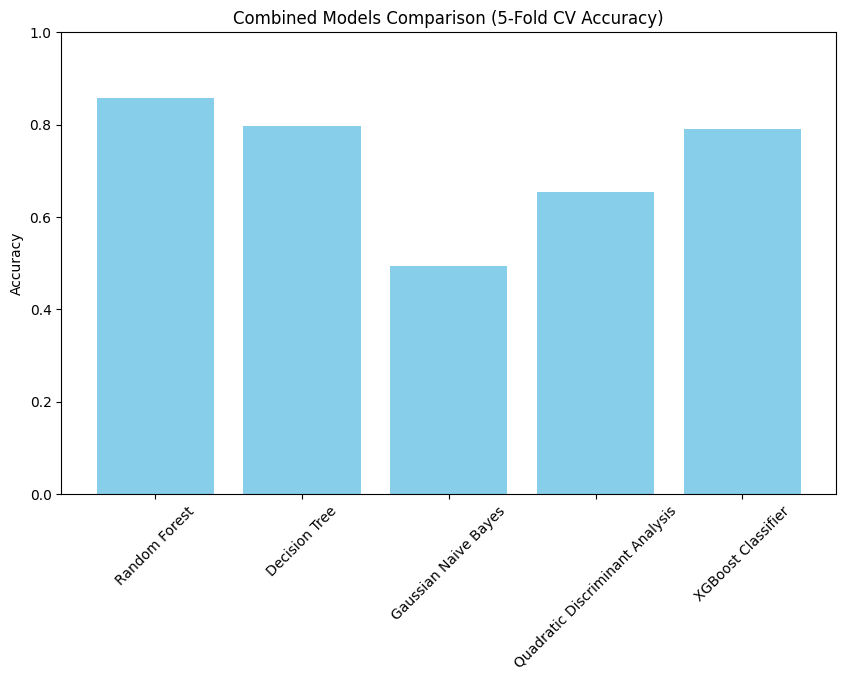

In [5]:
# =============================
# Step 11: Combined Models Comparison (with Label Encoding)
# =============================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Encode target labels if they are strings
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define all models in one dictionary (including your baseline Random Forest)
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    # 'SVC (Linear Kernel)': SVC(kernel='linear', probability=False, random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Dictionary to store the cross-validation accuracy results.
cv_results = {}

# Evaluate each model using a pipeline (StandardScaler included for consistency)
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    # Use 5-fold cross-validation with parallel processing
    scores = cross_val_score(pipeline, X_values, y_encoded, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = scores.mean()
    print(f"{model_name}: Mean Accuracy = {cv_results[model_name]:.4f}")

# Visualize the performance of each model with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cv_results.keys(), cv_results.values(), color='skyblue')
plt.title('Combined Models Comparison (5-Fold CV Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Top Two Models based on 5-fold CV:
Random Forest: Mean CV Accuracy = 0.8564
Decision Tree: Mean CV Accuracy = 0.7967

Detailed Analysis for: Random Forest
Training time for Random Forest: 73.42 seconds

Classification Report:
              precision    recall  f1-score   support

        bike       0.81      0.85      0.83     15000
         bus       0.72      0.72      0.72     15000
         car       0.84      0.78      0.81     15000
      subway       0.91      0.91      0.91     15000
       train       0.96      0.98      0.97     15000
        walk       0.85      0.84      0.84     15000

    accuracy                           0.85     90000
   macro avg       0.85      0.85      0.85     90000
weighted avg       0.85      0.85      0.85     90000



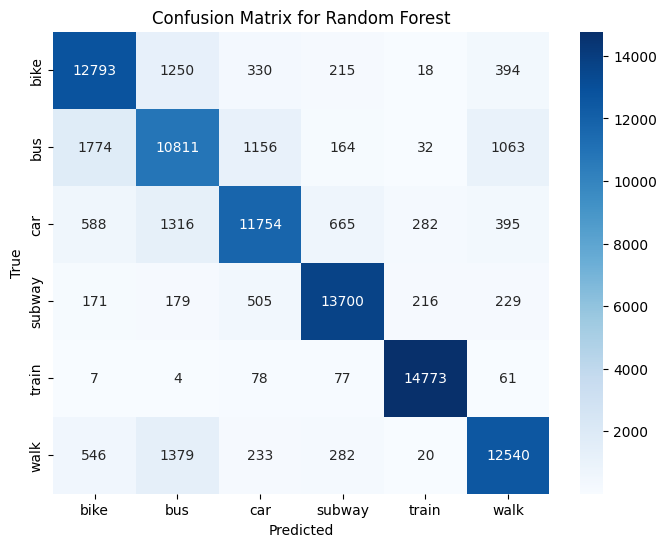

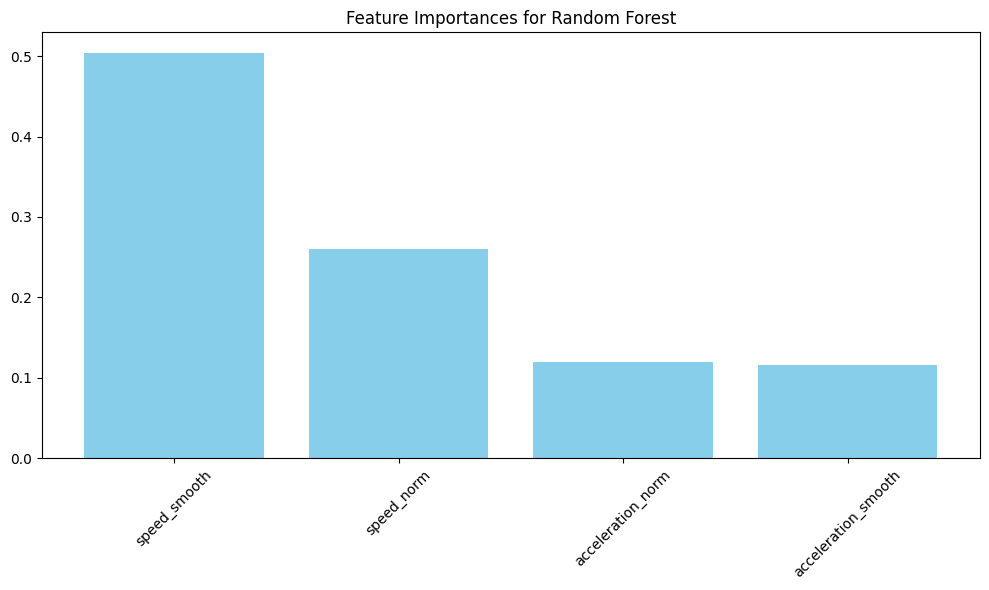


Detailed Analysis for: Decision Tree
Training time for Decision Tree: 2.17 seconds

Classification Report:
              precision    recall  f1-score   support

        bike       0.76      0.74      0.75     15000
         bus       0.64      0.62      0.63     15000
         car       0.74      0.75      0.75     15000
      subway       0.85      0.89      0.87     15000
       train       0.94      0.98      0.96     15000
        walk       0.78      0.75      0.77     15000

    accuracy                           0.79     90000
   macro avg       0.78      0.79      0.79     90000
weighted avg       0.78      0.79      0.79     90000



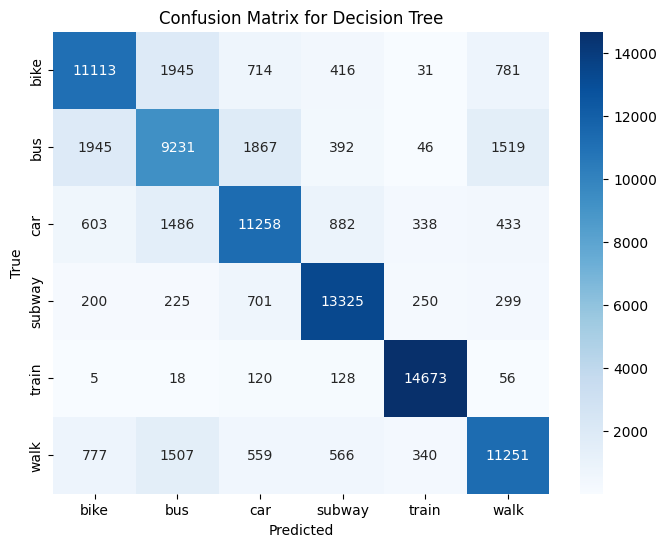

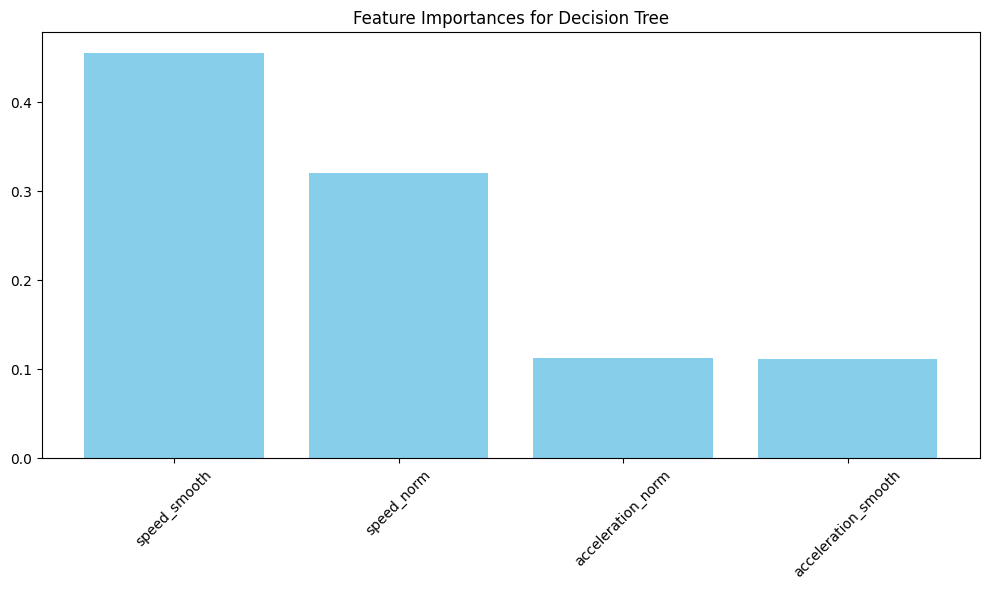

In [6]:
# =============================
# Step 12: Detailed Analysis for Top Two Models
# =============================
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# First, encode the balanced training and test labels.
le = LabelEncoder()
y_train_bal_encoded = le.fit_transform(y_train_bal)
y_test_encoded = le.transform(y_test)

# Sort the cv_results (obtained in Step 11) to get the top two models.
# (Assumes cv_results and models dictionaries are available from the previous cell.)
sorted_models = sorted(cv_results.items(), key=lambda x: x[1], reverse=True)
top_two = sorted_models[:2]
print("Top Two Models based on 5-fold CV:")
for model_name, acc in top_two:
    print(f"{model_name}: Mean CV Accuracy = {acc:.4f}")

# Create a dictionary for the top two models.
top_two_models = {model_name: models[model_name] for model_name, _ in top_two}

# Detailed analysis for each of the top two models.
for model_name, model in top_two_models.items():
    print("\n" + "="*50)
    print(f"Detailed Analysis for: {model_name}")
    
    # Create a pipeline with StandardScaler and the classifier.
    pipeline_model = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Measure training time on the balanced training set.
    start_time = time.time()
    pipeline_model.fit(X_train_bal, y_train_bal_encoded)
    training_time = time.time() - start_time
    print(f"Training time for {model_name}: {training_time:.2f} seconds")
    
    # Predict on the test set.
    y_pred_encoded = pipeline_model.predict(X_test)
    # Decode numeric predictions back to original string labels.
    y_pred = le.inverse_transform(y_pred_encoded)
    
    # Display the classification report.
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot the confusion matrix.
    classes = le.inverse_transform(np.arange(len(le.classes_)))
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # If the model supports feature importances (e.g., Random Forest), plot them.
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,6))
        plt.title(f"Feature Importances for {model_name}")
        plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
        plt.xticks(range(len(importances)), [candidate_features[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not provide feature importances directly.")